In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adult-census-income/adult.csv


In [3]:
data=pd.read_csv(r'../input/adult-census-income/adult.csv')
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
cols=data.columns

for col in cols:
    print("\n\nValue counts: ",data[col].value_counts())



Value counts:  age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64


Value counts:  workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


Value counts:  fnlwgt
164190    13
203488    13
123011    13
113364    12
121124    12
          ..
183522     1
44419      1
442612     1
374833     1
257302     1
Name: count, Length: 21648, dtype: int64


Value counts:  education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1

In [9]:
data=data.drop(['education', 'fnlwgt'],axis=1)
data.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [11]:
data.replace('?', np.nan, inplace=True)
data.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [12]:
data.fillna(method='ffill', inplace=True)

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,10,Widowed,Exec-managerial,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [15]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

categorical_cols=['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']

for col in categorical_cols:
    data[col]=lb.fit_transform(data[col])
    
data.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,8,9,6,14,1,4,0,0,4356,40,38,0
1,82,3,9,6,3,1,4,0,0,4356,18,38,0
2,66,3,10,6,3,4,2,0,0,4356,40,38,0
3,54,3,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,10,5,9,3,4,0,0,3900,40,38,0


Text(0.5, 1.0, 'Income count')

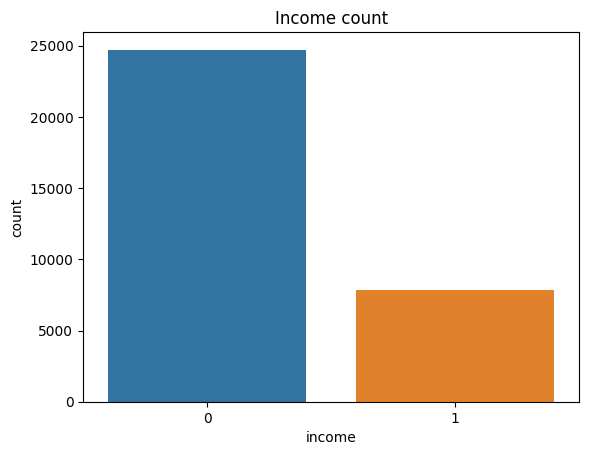

In [16]:
sns.countplot(x='income', data=data)
plt.title("Income count")

<Axes: >

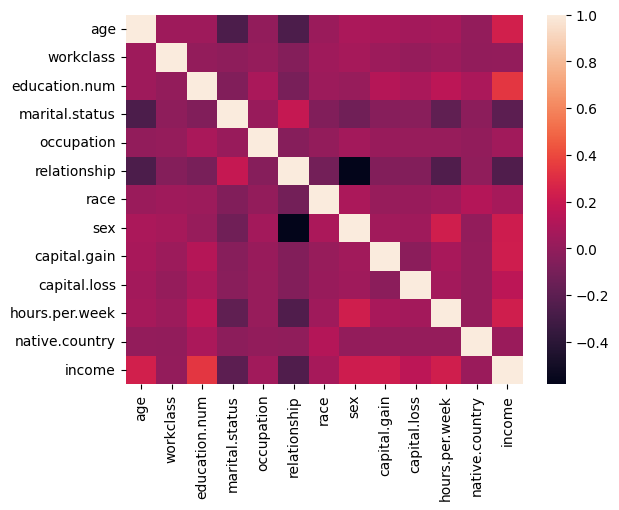

In [18]:
sns.heatmap(data.corr())

In [19]:
data.shape

(32561, 13)

In [20]:
x=data.iloc[:,:12]
x.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,8,9,6,14,1,4,0,0,4356,40,38
1,82,3,9,6,3,1,4,0,0,4356,18,38
2,66,3,10,6,3,4,2,0,0,4356,40,38
3,54,3,4,0,6,4,4,0,0,3900,40,38
4,41,3,10,5,9,3,4,0,0,3900,40,38


In [21]:
y=data.iloc[:,12:]
y.head()

,income
0,0
1,0
2,0
3,0
4,0


In [22]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

model.fit(x_train, y_train)
pred=model.predict(x_test)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

print("Accuracy_score: ",accuracy_score(pred,y_test))
print("\n\n Classification report: \n\n",classification_report(pred,y_test))
print("\n\n confusion matrix: ",confusion_matrix(pred, y_test))

Accuracy_score:  0.8080761553815446


 Classification report: 

               precision    recall  f1-score   support

           0       0.94      0.83      0.88      5660
           1       0.37      0.67      0.48       853

    accuracy                           0.81      6513
   macro avg       0.66      0.75      0.68      6513
weighted avg       0.87      0.81      0.83      6513



 confusion matrix:  [[4693  967]
 [ 283  570]]


In [25]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

model.fit(x_train, y_train)
pred=model.predict(x_test)
print("Accuracy_score: ",accuracy_score(pred,y_test))
print("\n\n Classification report: \n\n",classification_report(pred,y_test))
print("\n\n confusion matrix: ",confusion_matrix(pred, y_test))

Accuracy_score:  0.8157531091662829


 Classification report: 

               precision    recall  f1-score   support

           0       0.88      0.88      0.88      5016
           1       0.60      0.61      0.60      1497

    accuracy                           0.82      6513
   macro avg       0.74      0.74      0.74      6513
weighted avg       0.82      0.82      0.82      6513



 confusion matrix:  [[4396  620]
 [ 580  917]]


In [29]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

model.fit(x_train, y_train)
pred=model.predict(x_test)
print("Accuracy_score: ",accuracy_score(pred,y_test))
print("\n\n Classification report: \n\n",classification_report(pred,y_test))
print("\n\n confusion matrix: \n\n",confusion_matrix(pred, y_test))

/tmp/ipykernel_42/2592325753.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Accuracy_score:  0.8515277138031629


 Classification report: 

               precision    recall  f1-score   support

           0       0.92      0.89      0.90      5183
           1       0.62      0.71      0.66      1330

    accuracy                           0.85      6513
   macro avg       0.77      0.80      0.78      6513
weighted avg       0.86      0.85      0.86      6513



 confusion matrix: 

 [[4596  587]
 [ 380  950]]


In [27]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()

model.fit(x_train, y_train)
pred=model.predict(x_test)
print("Accuracy_score: ",accuracy_score(pred,y_test))
print("\n\n Classification report: \n\n",classification_report(pred,y_test))
print("\n\n confusion matrix: ",confusion_matrix(pred, y_test))

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy_score:  0.8639643789344388


 Classification report: 

               precision    recall  f1-score   support

           0       0.95      0.88      0.91      5378
           1       0.58      0.79      0.67      1135

    accuracy                           0.86      6513
   macro avg       0.77      0.83      0.79      6513
weighted avg       0.89      0.86      0.87      6513



 confusion matrix:  [[4734  644]
 [ 242  893]]


In [31]:
import xgboost as xgb
model=xgb.XGBClassifier()

model.fit(x_train, y_train)
pred=model.predict(x_test)
print("Accuracy_score: ",accuracy_score(pred,y_test))
print("\n\n Classification report: \n\n",classification_report(pred,y_test))
print("\n\n confusion matrix: ",confusion_matrix(pred, y_test))

Accuracy_score:  0.8721019499462613


 Classification report: 

               precision    recall  f1-score   support

           0       0.94      0.90      0.92      5235
           1       0.64      0.78      0.70      1278

    accuracy                           0.87      6513
   macro avg       0.79      0.84      0.81      6513
weighted avg       0.88      0.87      0.88      6513



 confusion matrix:  [[4689  546]
 [ 287  991]]


In [30]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
pred=model.predict(x_test)
print("Accuracy_score: ",accuracy_score(pred,y_test))
print("\n\n Classification report: \n\n",classification_report(pred,y_test))
print("\n\n confusion matrix: ",confusion_matrix(pred, y_test))

Accuracy_score:  0.7997850452940273


 Classification report: 

               precision    recall  f1-score   support

           0       0.95      0.82      0.88      5786
           1       0.31      0.66      0.42       727

    accuracy                           0.80      6513
   macro avg       0.63      0.74      0.65      6513
weighted avg       0.88      0.80      0.83      6513



 confusion matrix:  [[4729 1057]
 [ 247  480]]


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
